In [189]:
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN
import seaborn as sns
from sklearn.metrics import confusion_matrix
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

In [190]:
os.chdir("G:/ml/edwiser/churn")

In [191]:
train = pd.read_csv("Train_data.csv")
test = pd.read_csv("Test_data.csv")

## Basic Exploration

In [192]:
train.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


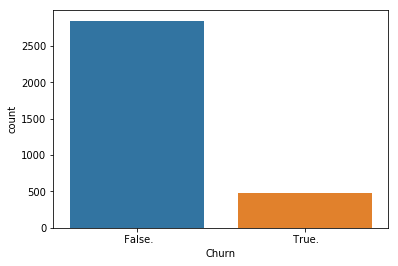

In [193]:
sns.countplot(train['Churn'])

In [194]:
pd.crosstab(train['Churn'],train['Churn'])

Churn,False.,True.
Churn,,
False.,2850,0
True.,0,483


In [195]:
#Numerical columns
numericColumns = ['account length',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'number customer service calls']

In [196]:
#categorical columns in data set will be in lis
lis = ['state', 'area code','phone number', 'international plan', 'voice mail plan', 'Churn']

In [197]:
#Bind your train and test data for unique changes to made.
#Once data has been processed, then we can again split into test and train

Binded = train.append(test)
Binded = Binded.reset_index(drop = True)


In [198]:
#Assigning levels to the categories


for i in range(0,Binded.shape[1]):
    if(Binded.iloc[:,i].dtypes=="object"):
        Binded.iloc[:,i]=pd.Categorical(Binded.iloc[:,i])
        Binded.iloc[:,i]=Binded.iloc[:,i].cat.codes
        Binded.iloc[:,i]= Binded.iloc[:,i].astype('category')
   


In [199]:
#Changing area code into categorical variable
Binded['area code']=pd.Categorical(Binded['area code'])
Binded['area code']=Binded['area code'].cat.codes
Binded['area code']=  Binded.iloc[:,2].astype('category')
Binded['phone number']=pd.Categorical(Binded['phone number'])
Binded['phone number']=Binded['phone number'].cat.codes
Binded['phone number']= Binded['phone number'].astype('category')

In [200]:
train = Binded.iloc[0:3333,:]
test = Binded.iloc[3333:5000,:]

print(train.shape)
print(test.shape)



(3333, 21)
(1667, 21)


## Missing Value analysis

In [201]:
#Missing value analysis

missingValues = pd.DataFrame(train.isnull().sum())
missingValues = missingValues.reset_index()
missingValues = missingValues.rename(columns = {"index": "Variables", 0:"Missing count"})
missingValues

,Variables,Missing count
0,state,0
1,account length,0
2,area code,0
3,phone number,0
4,international plan,0
5,voice mail plan,0
6,number vmail messages,0
7,total day minutes,0
8,total day calls,0
9,total day charge,0


No missing values. This training data has been completely filled

## Outlier analysis

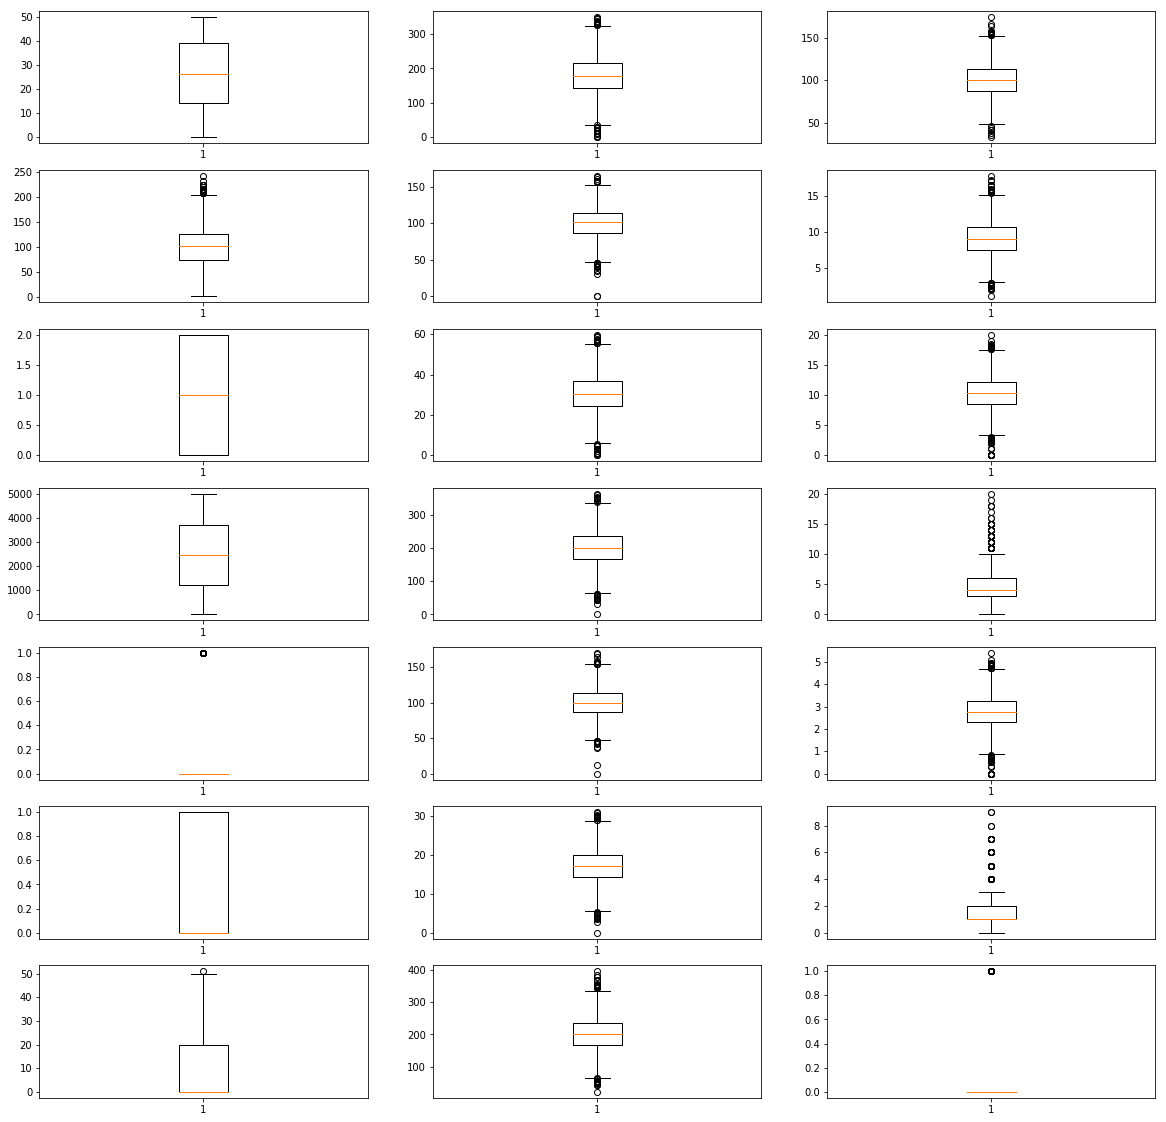

In [202]:
# %matplotlib.inline
fig, ax = plt.subplots(nrows = 7, ncols=3)
fig.set_size_inches(20,20)
indexCount=0
for col in range(3):
    for row in range(7):
        ax[row,col].boxplot(train.iloc[:,indexCount])
        indexCount =indexCount+1   

plt.show()

In [203]:
#Box plot method to replace all the outlier values

for i in numericColumns:
    q75, q25 = np.percentile(train[i], [75,25])
    iqr = q75-q25
    
    min = q25-iqr*1.5
    max = q75+iqr*1.5
    
    #Median as replacement value
    replacementValue=np.median(train[i])
    
    #Mean as replacement value
    #replacementValue=np.mean(train[i])
    
    train.loc[ train[i]<min,i]=replacementValue
    train.loc[ train[i]>max,i]=replacementValue
    

G:\Anaconda\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [ ]:
#KN imputation method for replacing na values
Binded=pd.DataFrame(KNN(k=3).fit_transform(Binded),columns=Binded.columns)

## Feature selection

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

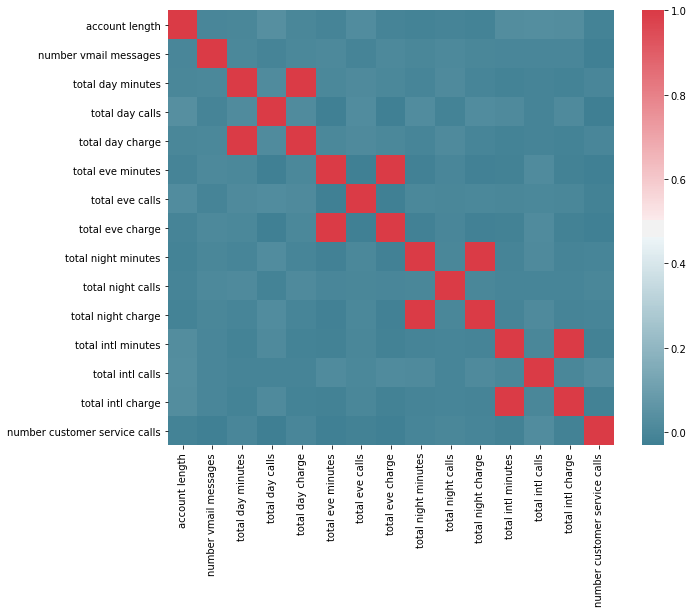

In [205]:
f, ax = plt.subplots(figsize=(10,8))
corr = train.corr()


sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True))

#### Correlated features are removed from test and train dataset using below code

In [206]:
#To remove given list in list
def removeList(elements, list):
    for x in elements:
        list.remove(x)


In [207]:
#Drop correlated variables
Binded.drop(['total day minutes', 'total eve minutes', 'total night minutes','total intl minutes'],1, inplace = True)
train.drop(['total day minutes', 'total eve minutes', 'total night minutes','total intl minutes'],1, inplace = True)
test.drop(['total day minutes', 'total eve minutes', 'total night minutes','total intl minutes'],1, inplace = True)
removeList(['total day minutes', 'total eve minutes', 'total night minutes','total intl minutes'], numericColumns)

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
G:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [208]:
removeList(['phone number', 'Churn'], lis)
for i in lis:
    print(i)
    ch2, p, dof,ex = chi2_contingency(pd.crosstab(train['Churn'],train[i]))
    print(p)

state
0.002296221552011188
area code
0.9150556960243712
international plan
2.4931077033159556e-50
voice mail plan
5.15063965903898e-09


In [209]:
#Drop correlated variables
Binded.drop(['phone number','area code'],1,inplace=True)
train.drop(['phone number','area code'],1,inplace=True)
test.drop(['phone number','area code'],1,inplace=True)
removeList(['area code'], lis)

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
G:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## Feature Normalization

In [210]:
#Normalization
for i in numericColumns:
    train[i] = (train[i]-np.mean(train[i]))/train[i].std()
    test[i] = (test[i] - np.mean(test[i]))/test[i].std()

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
G:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [175]:
#Standardization
for i in numericColumns:
    train[i] = (train[i]-train[i].min())/(train[i].max() - train[i].min())
    test[i] = (test[i]-test[i].min())/(test[i].max() - test[i].min())

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
G:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [176]:
test.head(10)

,state,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,number customer service calls,Churn
3333,11,0.421941,0,0,0.000000,0.706349,0.186392,0.267176,0.562500,0.429412,0.618521,0.157895,0.537594,0.428571,0
3334,26,0.573840,0,0,0.000000,0.412698,0.629093,0.770992,0.660265,0.476471,0.246942,0.368421,0.483083,0.000000,0
3335,35,0.430380,0,1,0.557692,0.484127,0.835266,0.511450,0.637919,0.747059,0.786838,0.315789,0.695489,0.142857,0
3336,32,0.413502,0,0,0.000000,0.706349,0.609482,0.381679,0.308659,0.482353,0.578334,0.105263,0.796992,0.142857,0
3337,40,0.451477,0,0,0.000000,0.349206,0.553206,0.480916,0.301676,0.629412,0.535818,0.210526,0.390977,0.285714,0
3338,12,0.489451,0,0,0.000000,0.404762,0.637619,0.229008,0.354050,0.529412,0.584741,0.263158,0.349624,0.142857,0
3339,28,0.261603,0,1,0.615385,0.714286,0.615450,0.664122,0.569832,0.705882,0.682003,0.157895,0.654135,0.142857,0
3340,18,0.392405,0,0,0.000000,0.500000,0.437585,0.564885,0.599860,0.623529,0.814793,0.315789,0.563910,0.000000,0
3341,24,0.578059,0,0,0.000000,0.658730,0.239256,0.061069,0.310056,0.417647,0.499126,0.210526,0.501880,0.285714,0
3342,43,0.535865,0,1,0.826923,0.523810,0.496419,0.389313,0.370810,0.541176,0.509027,0.052632,0.603383,0.000000,0


## Model Selection

## Decision Tree

In [211]:
clf = tree.DecisionTreeClassifier(criterion='entropy').fit(train.iloc[:,0:14],pd.Categorical(train.iloc[:,14]))

In [212]:
pred = clf.predict(test.iloc[:,0:14])

In [213]:
accuracy_score(pd.Categorical(test.iloc[:,14]),pred)

0.8770245950809838

In [214]:
pd.crosstab(pd.Categorical(test.iloc[:,14]),pred)

col_0,0,1
row_0,,
0,1337,106
1,99,125


### Accuracy = 0.86
### FNR: 103 / 109+115 = 0.48

## RandomForest

In [215]:
from sklearn.ensemble import RandomForestClassifier

In [216]:
RF = RandomForestClassifier(n_estimators=500).fit(train.iloc[:,0:14],pd.Categorical(train.iloc[:,14]))

In [217]:
pred = RF.predict(test.iloc[:,0:14])

In [218]:
accuracy_score(pd.Categorical(test.iloc[:,14]),pred)

0.9292141571685663

In [219]:
pd.crosstab(pd.Categorical(test.iloc[:,14]),pred)

col_0,0,1
row_0,,
0,1442,1
1,117,107


### Accuracy = 0.93
### FNR: 118 / 224 = 0.52

## Logit regression

In [220]:
#train_logit = pd.DataFrame(train['Churn'])
#test_logit = pd.DataFrame(test['Churn'])

Binded_logit = pd.DataFrame(Binded['Churn'])



In [221]:
#train_logit = train_logit.join(train[numericColumns])
#test_logit = test_logit.join(test[numericColumns])


Binded_logit = Binded_logit.join(Binded[numericColumns])

In [222]:
for i in lis:
    # train_logit = train_logit.join(pd.get_dummies(train[i], prefix  = i))
    # test_logit = test_logit.join(pd.get_dummies(test[i], prefix  = i))
        
    Binded_logit = Binded_logit.join(pd.get_dummies(Binded[i], prefix  = i))

In [223]:
Binded_logit.shape

(5000, 67)

In [224]:
Logit_model = sm.Logit(Binded_logit.iloc[0:3333,0].astype(int), Binded_logit.iloc[0:3333, 1:67].astype(float),).fit(method = 'bfgs', maxiter = 110)

Optimization terminated successfully.
         Current function value: 0.310865
         Iterations: 107
         Function evaluations: 114
         Gradient evaluations: 114


In [225]:
pred=Logit_model.predict(Binded_logit.iloc[3333:5000,1:67])
pred = pd.DataFrame(pred)
pred = pred.rename(columns={0:"pred"})
pred.loc[pred['pred']<0.5,:] = 0
pred.loc[pred['pred']>=0.5,:] = 1

In [226]:
pd.crosstab(Binded_logit.iloc[3333:5000,0],pred['pred'])

pred,0.0,1.0
Churn,,
0,1397,46
1,168,56


In [227]:
accuracy_score(Binded_logit.iloc[3333:5000,0].astype(float),pred['pred'])

0.871625674865027

### Accuracy = 0.87
### FNR: 168/224 = 0.75

# Synthetic data and Random Forest technique

In [228]:
Binded_csv = pd.read_csv("Synthetic_data.csv")
Binded_csv.columns = train.columns
Binded_csv.loc[ Binded_csv['Churn'] == 1,'Churn']=0
Binded_csv.loc[ Binded_csv['Churn'] == 2,'Churn']=1

for i in numericColumns:
    q75, q25 = np.percentile(Binded_csv[i], [75,25])
    iqr = q75-q25
    
    min = q25-iqr*1.5
    max = q75+iqr*1.5
    
    #Median as replacement value
    replacementValue=np.median(Binded_csv[i])
    
    #Mean as replacement value
    #replacementValue=np.mean(train[i])
    
    Binded_csv.loc[ Binded_csv[i]<min,i]=replacementValue
    Binded_csv.loc[ Binded_csv[i]>max,i]=replacementValue
    
    
for i in numericColumns:
    Binded_csv[i] = (Binded_csv[i]-Binded_csv[i].mean())/Binded_csv[i].std()


Binded_csv['state']= Binded_csv['state'].astype('category')

Binded_csv['international plan']= Binded_csv['international plan'].astype('category')

Binded_csv['voice mail plan']= Binded_csv['voice mail plan'].astype('category')

Binded_csv['Churn']= Binded_csv['Churn'].astype('category')


RF = RandomForestClassifier(n_estimators=100).fit(Binded_csv.iloc[:,0:14],pd.Categorical(Binded_csv['Churn']))


pred = RF.predict(test.iloc[:,0:14])

pd.crosstab(test.iloc[:,14], pred)


print(accuracy_score(pd.Categorical(test.iloc[:,14]), pred))



0.8446310737852429


In [229]:

pd.crosstab(test.iloc[:,14], pred)

col_0,0,1
Churn,,
0,1257,186
1,73,151


In [230]:
print(accuracy_score(pd.Categorical(test.iloc[:,14]), pred))

0.8446310737852429


## Accuracy - 84%
## FNR - 0.34